In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm_api
import sklearn.model_selection as skl_model  # pip install scikit-learn

# column names
headers = (
    "Cement (component 1)(kg in a m^3 mixture)", 
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)", 
    "Fly Ash (component 3)(kg in a m^3 mixture)", 
    "Water (component 4)(kg in a m^3 mixture)", 
    "Superplasticizer (component 5)(kg in a m^3 mixture)", 
    "Coarse Aggregate (component 6)(kg in a m^3 mixture)", 
    "Fine Aggregate (component 7)(kg in a m^3 mixture)", 
    "Age (day)", 
    "Concrete compressive strength(MPa, megapascals)"
)


data = pd.read_excel("dataset\\Concrete_Data.xls", names=headers)

In [34]:
print(f"Total numbers of rows in dataset: {data.shape[0]}")
print(f"Total numbers of columns in dataset: {data.shape[1]}")
data.head()

Total numbers of rows in dataset: 1030
Total numbers of columns in dataset: 9


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [35]:
target_columns = str(headers[-1])

def get_train_test_values(data):
    X = data.loc[:, data.columns != target_columns]
    y = data.loc[:, target_columns]
    return skl_model.train_test_split(X, y, test_size=0.30, random_state=42)

X_train, X_test, y_train, y_test = get_train_test_values(data)

In [36]:
X_train_with_constant = sm_api.add_constant(X_train)
model = sm_api.OLS(y_train, X_train_with_constant)

result = model.fit()
result.params

const                                                   -59.459040
Cement (component 1)(kg in a m^3 mixture)                 0.125445
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.116773
Fly Ash (component 3)(kg in a m^3 mixture)                0.090028
Water (component 4)(kg in a m^3 mixture)                 -0.090959
Superplasticizer (component 5)(kg in a m^3 mixture)       0.394906
Coarse Aggregate (component 6)(kg in a m^3 mixture)       0.028058
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.036344
Age (day)                                                 0.113948
dtype: float64

In [37]:
print(result.summary())

                                           OLS Regression Results                                          
Dep. Variable:     Concrete compressive strength(MPa, megapascals)   R-squared:                       0.620
Model:                                                         OLS   Adj. R-squared:                  0.615
Method:                                              Least Squares   F-statistic:                     145.0
Date:                                             Tue, 11 Apr 2023   Prob (F-statistic):          6.72e-144
Time:                                                     23:44:00   Log-Likelihood:                -2708.5
No. Observations:                                              721   AIC:                             5435.
Df Residuals:                                                  712   BIC:                             5476.
Df Model:                                                        8                                         
Covariance Type:            

In [38]:

X_test = sm_api.add_constant(X_test)

y_predicted = result.predict(X_test)
residual = y_test - y_predicted


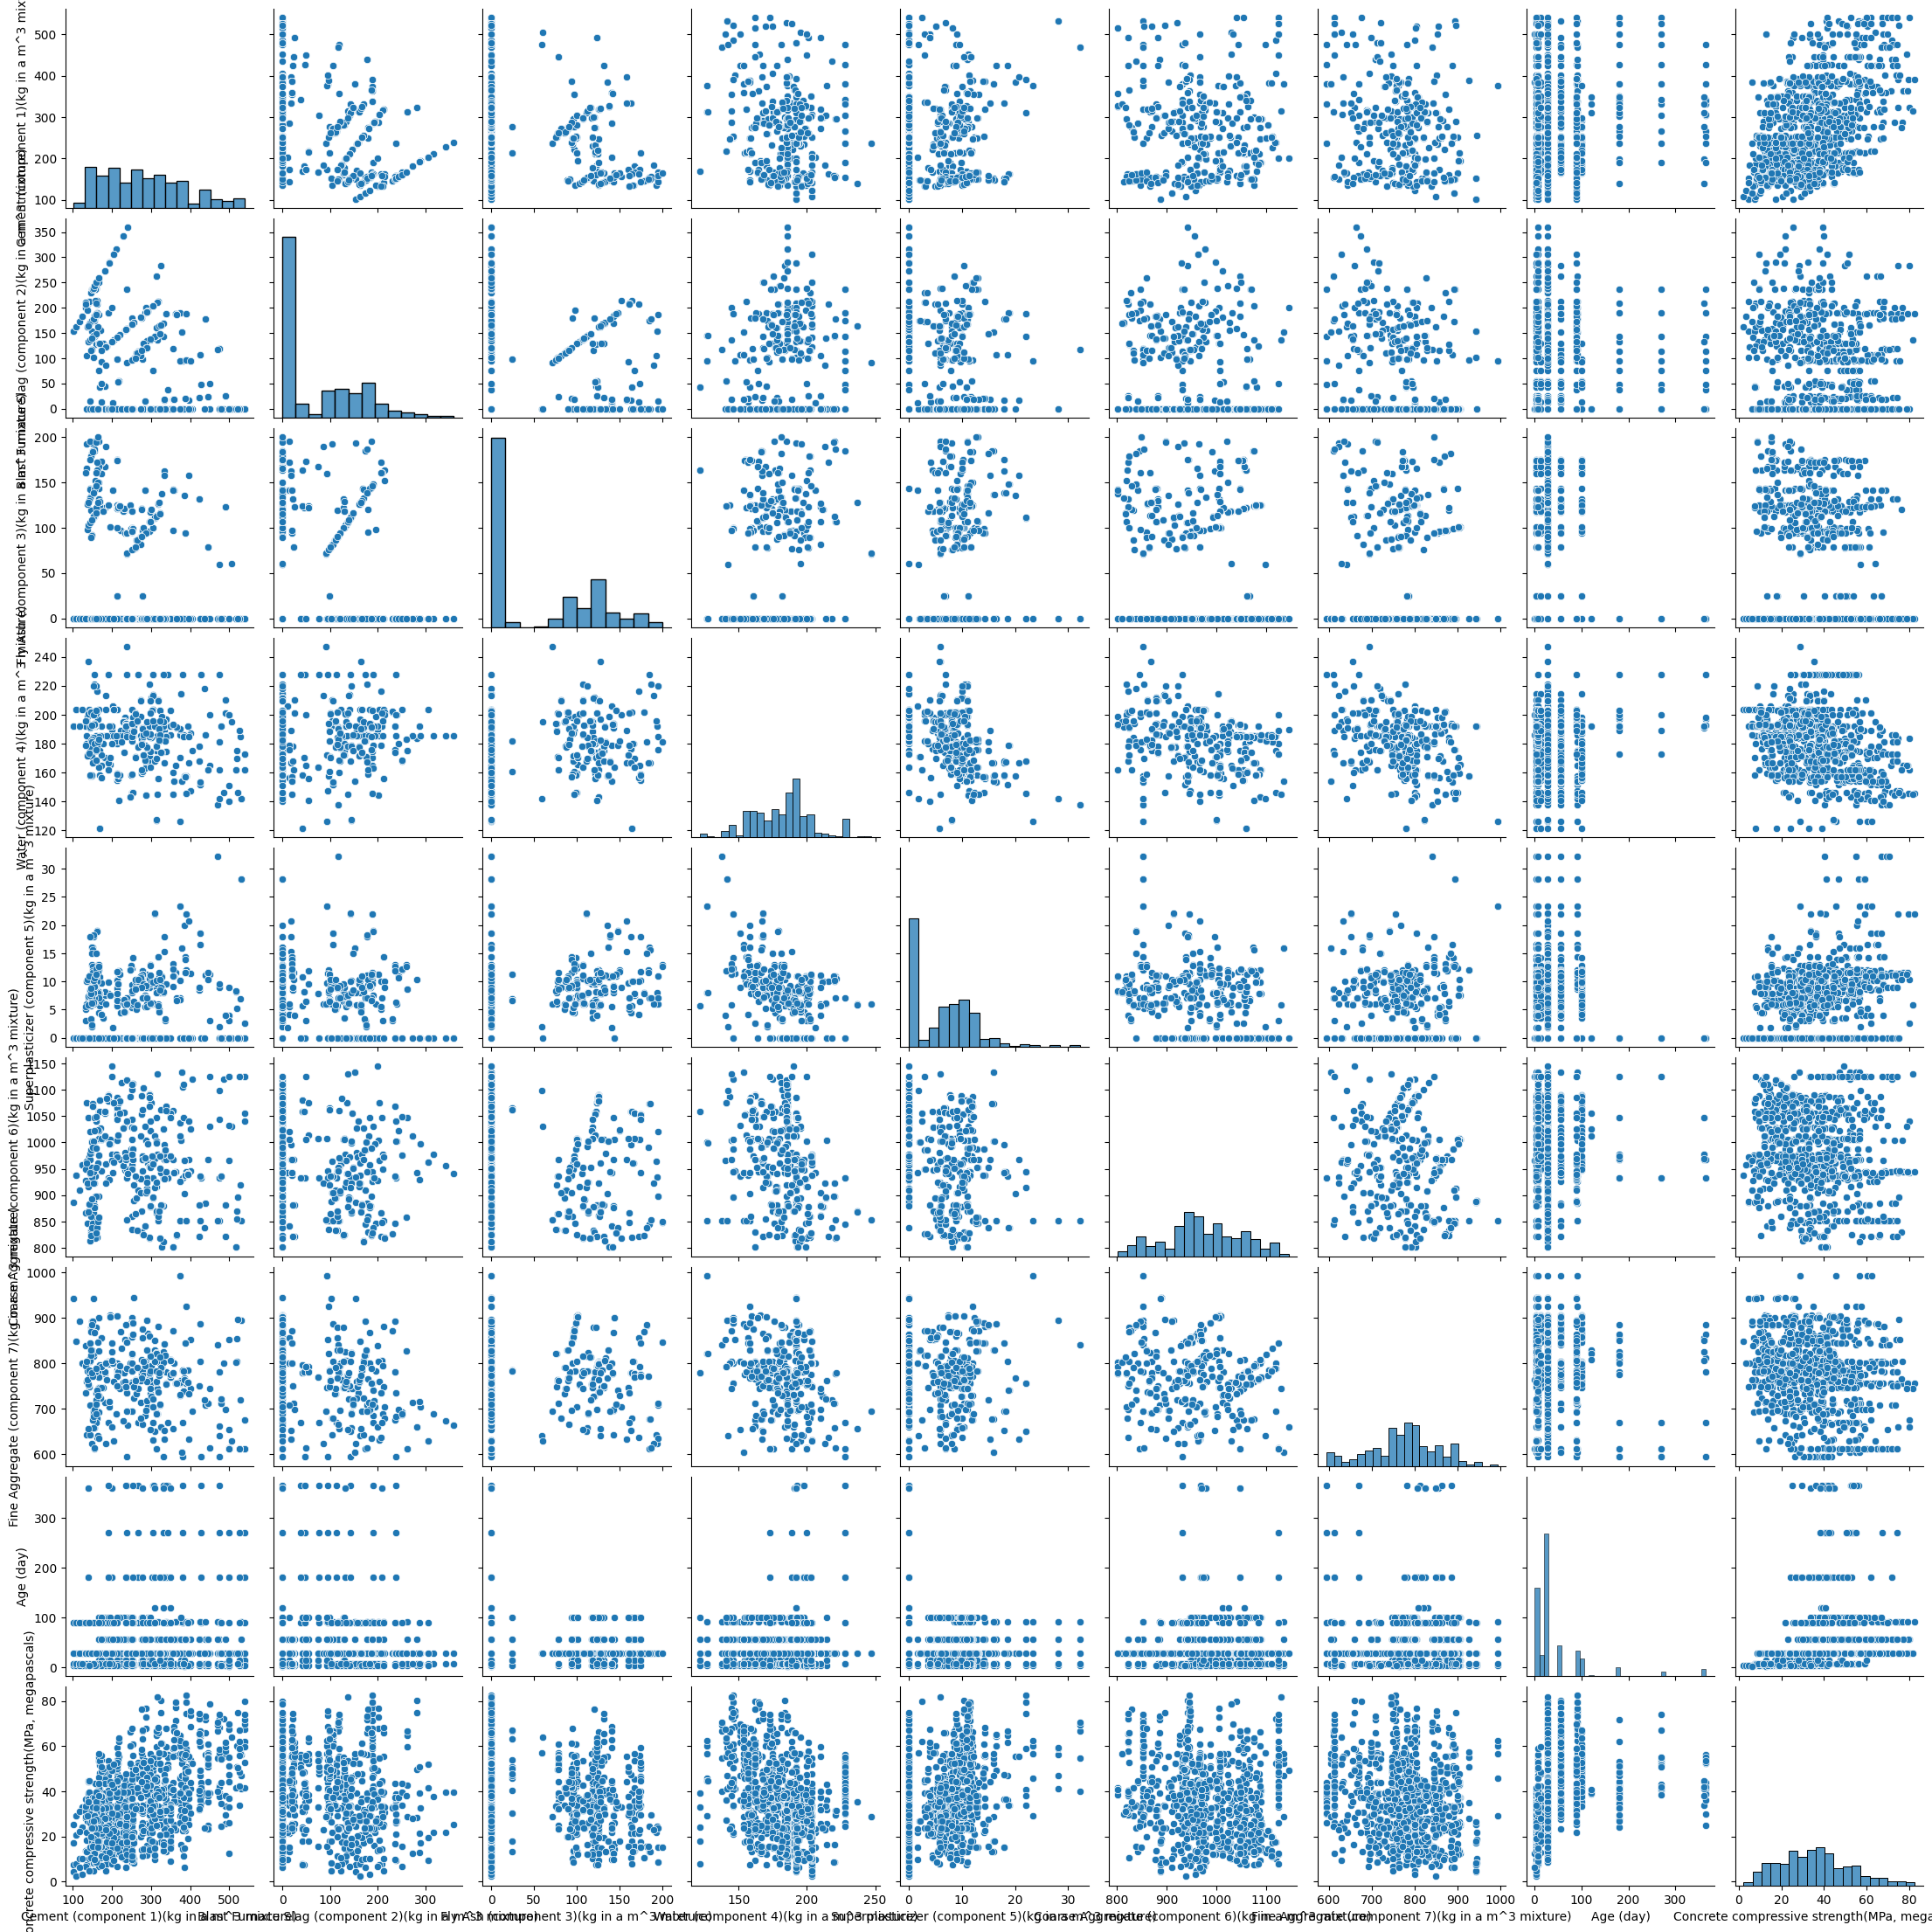

In [39]:
import seaborn as sns

sns.pairplot(data)

In [40]:

correlation = data.corr().loc[headers, headers]
correlation

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<Axes: >

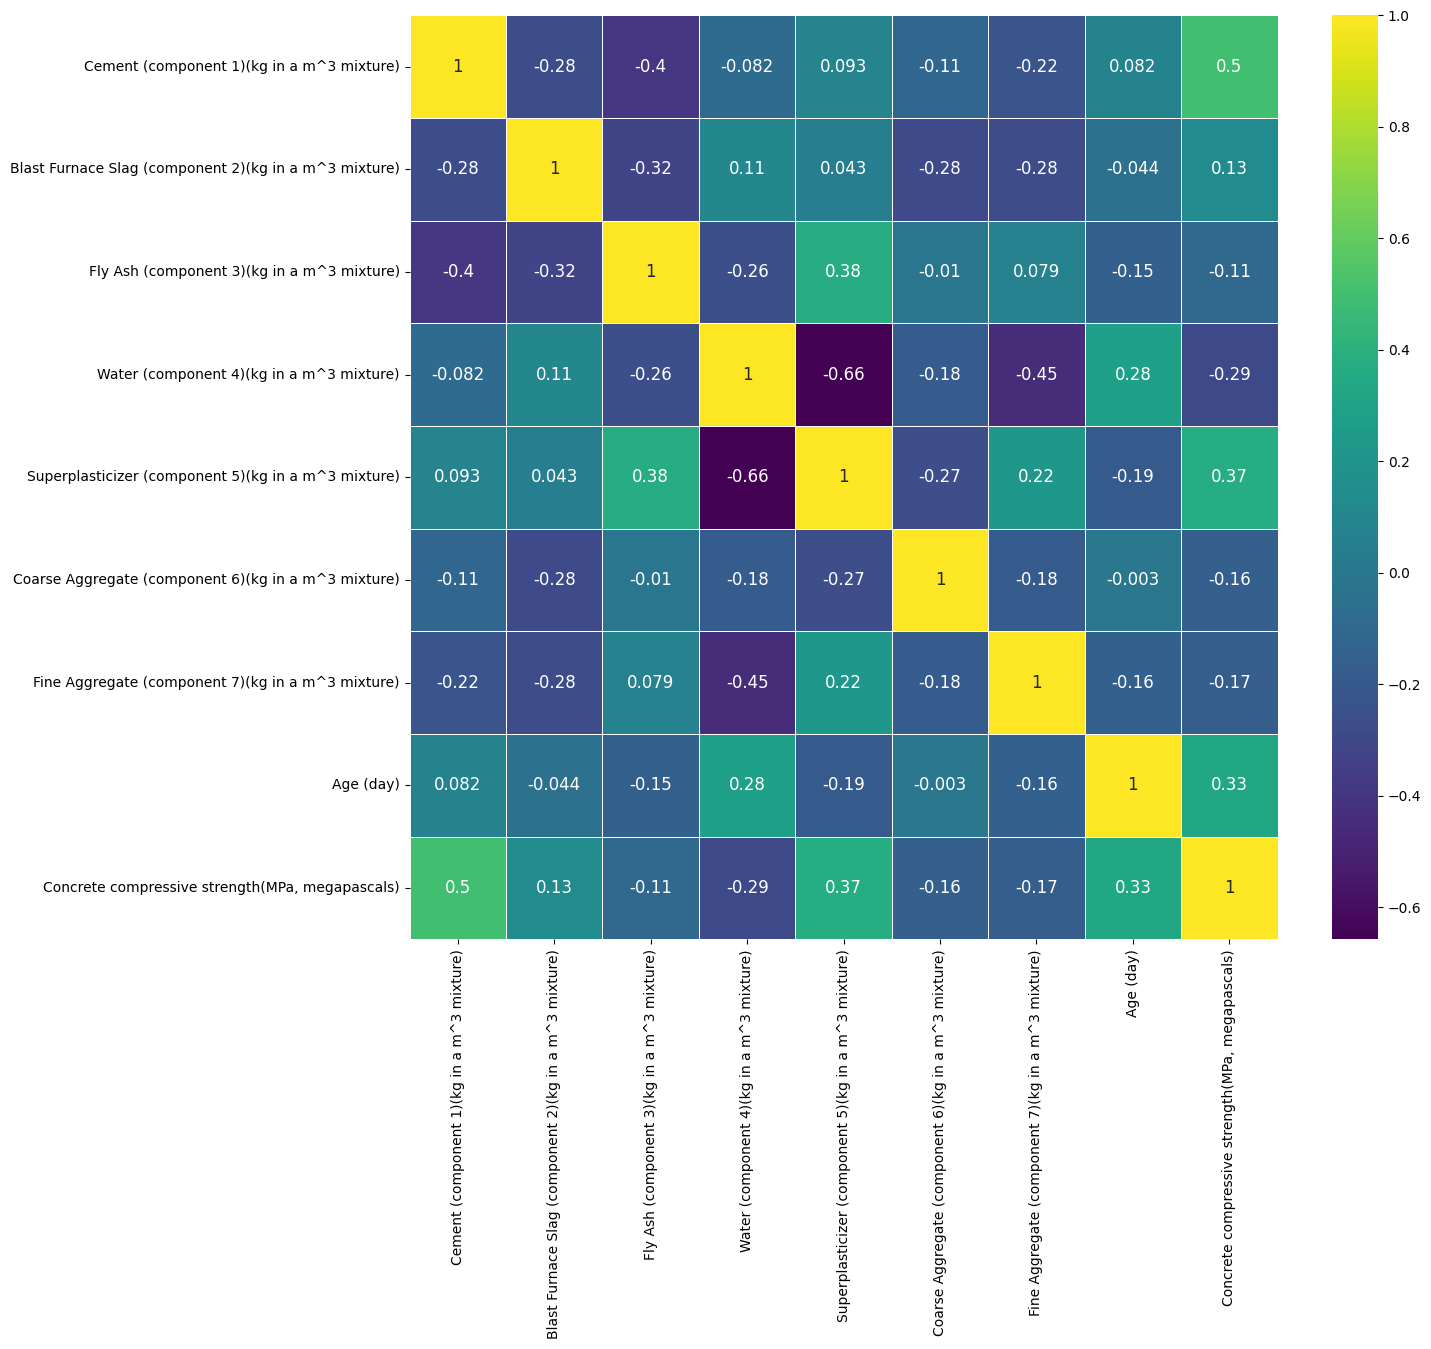

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(correlation, linewidths=0.5, annot=True, cmap="viridis", linecolor="white", annot_kws={"size": 12})

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

'''
1. calculate "vif"
2. get index of max value
3. check value (must be less than 10) -> if true: return
4. get collumn name by index
5. copy dataset without collumn
'''

vifs = []

def foo(data):
    new_X_train = X_train
    if (max(vif) >= 10):
        new_data = data.drop(data.columns[vif.index(max(vif))], axis = 1)
        new_X_train = get_train_test_values(new_data)[0]
    
        vif = [variance_inflation_factor(new_X_train.values, i) for i in range(new_X_train.shape[1])]
        vifs.append(vif)
    

pd.DataFrame({'vif': vif[0:]}, index=new_X_train.columns).T

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vifs.append(vif)

pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
vif,15.279582,3.39085,3.992964,83.246126,5.238674,84.103459,70.064222,1.717938


In [62]:
new_X_train = X_train
if (max(vif) >= 10):
    new_data = data.drop(data.columns[vif.index(max(vif))], axis = 1)
    new_X_train = get_train_test_values(new_data)[0]
    
    vif = [variance_inflation_factor(new_X_train.values, i) for i in range(new_X_train.shape[1])]
    vifs.append(vif)
    

pd.DataFrame({'vif': vif[0:]}, index=new_X_train.columns).T

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
vif,14.097982,3.364518,3.792696,71.867106,5.170375,49.092079,1.716982


In [63]:
new_X_train = X_train
if (max(vif) >= 10):
    new_data = data.drop(data.columns[vif.index(max(vif))], axis = 1)
    new_X_train = get_train_test_values(new_data)[0]
    
    vif = [variance_inflation_factor(new_X_train.values, i) for i in range(new_X_train.shape[1])]
    vifs.append(vif)
    

pd.DataFrame({'vif': vif[0:]}, index=new_X_train.columns).T

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
vif,12.603341,2.453605,3.448956,3.491413,72.60725,55.635277,1.613004


<Axes: ylabel='Density'>

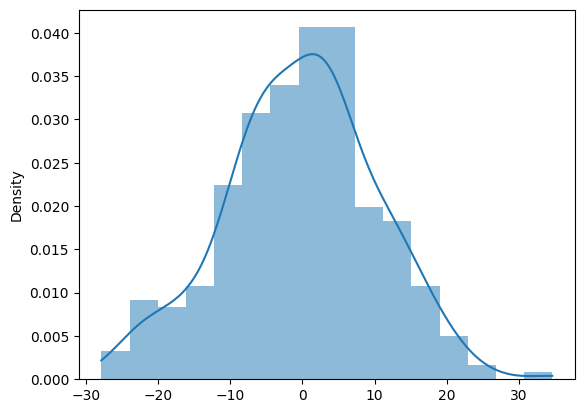

In [44]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

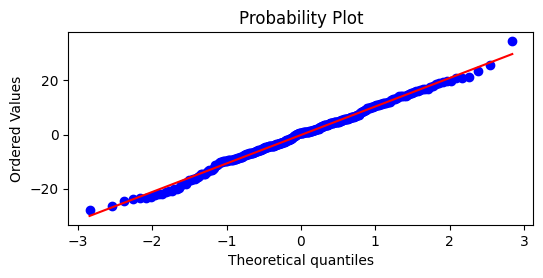

In [45]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6, 2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [46]:
np.mean(residual)

-0.17536385506724295

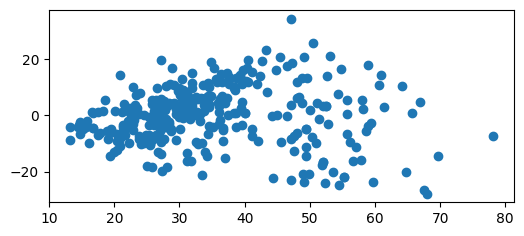

In [47]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_predicted, residual)

C:\Users\jackf\AppData\Local\Temp\ipykernel_13840\1750965908.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


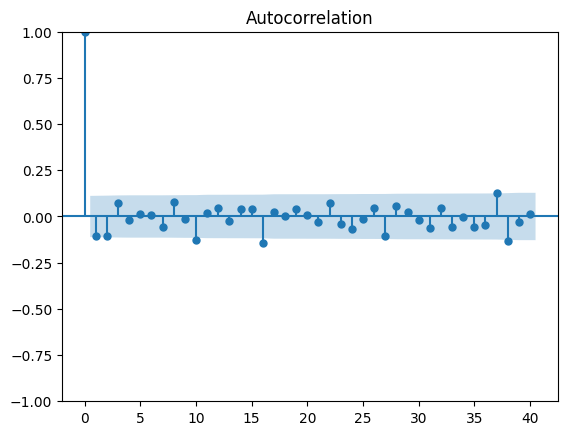

In [48]:
import statsmodels.tsa.api as smt_api

acf = smt_api.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()